In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#load Billboard data set
df1=pd.read_csv('BillBoard_Features.csv')
df1.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [3]:
#remove SpotifyID column
df1.drop('SpotifyID',axis=1,inplace=True)

In [4]:
df1.shape

(9329, 14)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   danceability      9329 non-null   float64
 3   energy            9329 non-null   float64
 4   key               9329 non-null   int64  
 5   mode              9329 non-null   int64  
 6   speechiness       9329 non-null   float64
 7   acousticness      9329 non-null   float64
 8   instrumentalness  9329 non-null   float64
 9   liveness          9329 non-null   float64
 10  valence           9329 non-null   float64
 11  tempo             9329 non-null   float64
 12  duration_ms       9329 non-null   int64  
 13  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 1020.5+ KB


In [6]:
#check for null values
df1.isnull().sum()

Track               1
Artist              2
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

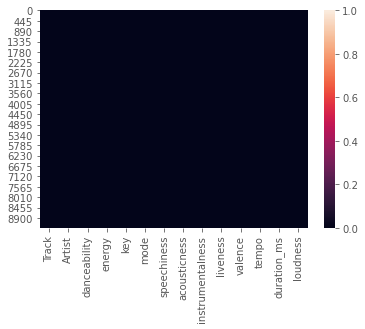

% of null values 
 Track               0.010719
Artist              0.021439
danceability        0.000000
energy              0.000000
key                 0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
duration_ms         0.000000
loudness            0.000000
dtype: float64


In [7]:
#visualize null values
sns.heatmap(df1.isnull())
plt.show()
print('% of null values \n',df1.isnull().sum()*100/df1.shape[0])

In [8]:
#since null values are very less 0.01 & 0.02% so we remove those observations
df1=df1.dropna()

In [9]:
#check for null values again
df1.isnull().sum()

Track               0
Artist              0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

In [10]:
#now we check for unique values so that we will get idea that we are 
#having any special character or value inplace of Null values
for col in df1:
    print(col)
    print(df1[col].unique())

Track
['Lucid Dreams' 'Better Now' 'Drip Too Hard' ... 'Got To Have Your Love'
 'All Nite' 'The Arms Of Orion']
Artist
['Juice WRLD' 'Post Malone' 'Lil Baby & Gunna' ...
 'Mantronix Featuring Wondress' 'Entouch Featuring Keith Sweat'
 'Prince With Sheena Easton']
danceability
[ 5.11e-01  6.80e-01  8.97e-01  8.34e-01  5.96e-01  8.16e-01  8.35e-01
  7.04e-01  4.77e-01  9.01e-01  7.52e-01  9.12e-01  6.01e-01  4.87e-01
  7.29e-01  6.76e-01  7.43e-01  7.50e-01  5.79e-01  7.40e-01  6.66e-01
  5.53e-01  7.49e-01  6.99e-01  1.62e-01  3.62e-01  4.89e-01  5.33e-01
  8.92e-01  3.23e-01  7.58e-01  4.55e-01  8.21e-01  8.50e-01  5.57e-01
  5.44e-01  5.07e-01  7.11e-01  6.16e-01  5.13e-01  4.99e-01  4.86e-01
  5.34e-01  8.79e-01  6.20e-01  7.66e-01  7.16e-01  7.55e-01  7.41e-01
  6.29e-01  4.34e-01  7.92e-01  7.28e-01  4.85e-01  6.58e-01  8.22e-01
  7.69e-01  8.07e-01  7.88e-01  9.29e-01  6.41e-01  5.52e-01  6.78e-01
  8.95e-01  7.54e-01  7.46e-01  5.78e-01  5.99e-01  5.86e-01  8.55e-01
  6.71e-01  8

In [11]:
#so we have -999 value in Mode and key column 
#mode column should contain values 0,1 so we have to replace -999 as null
df1['mode'].replace(-999,np.nan,inplace=True)

In [12]:
df1.isnull().sum()

Track                0
Artist               0
danceability         0
energy               0
key                  0
mode                10
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
loudness             0
dtype: int64

In [13]:
#so we got 10 observations having null values
#since mode is target variable
#so we remove null values from dataset instead of replacing with mean or median
df1=df1.dropna()

In [14]:
df1.isnull().sum()

Track               0
Artist              0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

In [15]:
#now we check for unique values so that we will get idea that we are 
#having any special character or value inplace of Null values
for col in df1:
    print(col)
    print(df1[col].unique())

Track
['Lucid Dreams' 'Better Now' 'Drip Too Hard' ... 'Got To Have Your Love'
 'All Nite' 'The Arms Of Orion']
Artist
['Juice WRLD' 'Post Malone' 'Lil Baby & Gunna' ...
 'Mantronix Featuring Wondress' 'Entouch Featuring Keith Sweat'
 'Prince With Sheena Easton']
danceability
[0.511  0.68   0.897  0.834  0.596  0.816  0.835  0.704  0.477  0.901
 0.752  0.912  0.601  0.487  0.729  0.676  0.743  0.75   0.579  0.74
 0.666  0.553  0.749  0.699  0.162  0.362  0.489  0.533  0.892  0.323
 0.758  0.455  0.821  0.85   0.557  0.544  0.507  0.711  0.616  0.513
 0.499  0.486  0.534  0.879  0.62   0.766  0.716  0.755  0.741  0.629
 0.434  0.792  0.728  0.485  0.658  0.822  0.769  0.807  0.788  0.929
 0.641  0.552  0.678  0.895  0.754  0.746  0.578  0.599  0.586  0.855
 0.671  0.83   0.687  0.597  0.785  0.665  0.52   0.939  0.565  0.698
 0.638  0.374  0.78   0.71   0.69   0.809  0.272  0.554  0.936  0.907
 0.76   0.626  0.637  0.791  0.921  0.632  0.653  0.669  0.799  0.767
 0.854  0.622  0.66   0.

In [16]:
#load MSD_Features data set
df2=pd.read_csv('MSD_Features.csv')
df2.head()

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [17]:
#rename columns
df2=df2.rename({'0':'Artist','1':'Album','2':'Track','3':'Year'},axis=1)

In [18]:
#remove ID columns
df2.drop(['4','5'],axis=1,inplace=True)

In [19]:
df2.head()

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [20]:
df2.shape

(5603, 16)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            5603 non-null   object 
 1   Album             5603 non-null   object 
 2   Track             5603 non-null   object 
 3   Year              5603 non-null   int64  
 4   danceability      5603 non-null   float64
 5   energy            5603 non-null   float64
 6   key               5603 non-null   int64  
 7   loudness          5603 non-null   float64
 8   mode              5603 non-null   int64  
 9   speechiness       5603 non-null   float64
 10  acousticness      5603 non-null   float64
 11  instrumentalness  5603 non-null   float64
 12  liveness          5603 non-null   float64
 13  valence           5603 non-null   float64
 14  tempo             5603 non-null   float64
 15  duration_ms       5603 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory 

In [22]:
#check for null values
df2.isnull().sum()

Artist              0
Album               0
Track               0
Year                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [23]:
#no null values are found 
#we check for unique values
for col in df2:
    print(col)
    print(df2[col].unique())

Artist
['Sonora Santanera' 'JennyAnyKind' 'Casual' ... 'Owsley'
 'Little Willie John' 'Mouth Of The Architect']
Album
['Las Numero 1 De La Sonora Santanera' 'I Need You' 'Fear Itself' ...
 'Return Of The Guardians' 'Sin / Pecado' 'Once Upon A Shattered Life']
Track
['Amor De Cabaret' 'Young Boy Blues' "I Didn't Mean To" ...
 'Shattered Life' 'One the road (to Damnation)'
 'The Wonderful World Of The Young']
Year
[2016 2000 1994 2006 2003 2019 2009 2002 2018 1998 2008 1997 2004 2007
 2011 2001 2010 2014 1999 1996 2012 2005 1993 1995 1992 1990 2015 2013
 2017 1991]
danceability
[0.699  0.458  0.751  0.456  0.498  0.683  0.591  0.583  0.581  0.756
 0.569  0.537  0.499  0.197  0.839  0.532  0.579  0.21   0.794  0.66
 0.477  0.258  0.254  0.606  0.531  0.573  0.485  0.596  0.633  0.5
 0.282  0.704  0.694  0.737  0.63   0.692  0.836  0.767  0.31   0.149
 0.638  0.746  0.685  0.841  0.56   0.507  0.471  0.557  0.728  0.208
 0.549  0.582  0.672  0.172  0.763  0.616  0.323  0.85   0.919  0.587


In [24]:
#we dont have any other values inplace of null values

In [25]:
df=pd.concat([df1,df2])
df.head()

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Album,Year
0,Lucid Dreams,Juice WRLD,0.511,0.566,6,0.0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,NaN,NaN
1,Better Now,Post Malone,0.680,0.578,10,1.0,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,NaN,NaN
2,Drip Too Hard,Lil Baby & Gunna,0.897,0.662,1,0.0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,NaN,NaN
3,Sicko Mode,Travis Scott,0.834,0.730,8,1.0,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,NaN,NaN
4,Youngblood,5 Seconds Of Summer,0.596,0.854,7,0.0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,NaN,NaN


In [26]:
df.shape

(14920, 16)

In [27]:
#key attribute work as song key based on their track
df['key'].unique()

array([ 6, 10,  1,  8,  7,  5,  2, 11,  4,  9,  0,  3], dtype=int64)

In [28]:
df['key'].value_counts()

7     1783
0     1656
1     1619
2     1464
9     1408
5     1163
11    1160
4     1110
6     1065
10    1042
8     1033
3      417
Name: key, dtype: int64

In [29]:
#removing duplicates
df.sort_values('Track')
df.drop_duplicates(subset='Track',keep=False,inplace=True)

In [30]:
df.shape

(12117, 16)

In [31]:
#check for null values
df.isnull().sum()

Track                  0
Artist                 0
danceability           0
energy                 0
key                    0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
loudness               0
Album               7157
Year                7157
dtype: int64

In [32]:
df.isnull().sum()*100/df.shape[0]

Track                0.000000
Artist               0.000000
danceability         0.000000
energy               0.000000
key                  0.000000
mode                 0.000000
speechiness          0.000000
acousticness         0.000000
instrumentalness     0.000000
liveness             0.000000
valence              0.000000
tempo                0.000000
duration_ms          0.000000
loudness             0.000000
Album               59.065775
Year                59.065775
dtype: float64

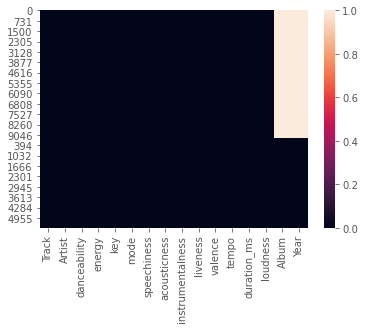

In [33]:
sns.heatmap(df.isnull())
plt.show()

In [34]:
#we have more than 50% of values are null in column Album and Year
#so we remove those columns
df.drop(['Album','Year'],axis=1,inplace=True)

In [35]:
#change order of columns
df=df[['Track','Artist','key','danceability','energy','speechiness','acousticness','instrumentalness','liveness',
'valence','tempo','duration_ms','loudness','mode']]

In [36]:
df.shape

(12117, 14)

In [37]:
df['mode']=df['mode'].astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12117 entries, 0 to 5602
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             12117 non-null  object 
 1   Artist            12117 non-null  object 
 2   key               12117 non-null  int64  
 3   danceability      12117 non-null  float64
 4   energy            12117 non-null  float64
 5   speechiness       12117 non-null  float64
 6   acousticness      12117 non-null  float64
 7   instrumentalness  12117 non-null  float64
 8   liveness          12117 non-null  float64
 9   valence           12117 non-null  float64
 10  tempo             12117 non-null  float64
 11  duration_ms       12117 non-null  int64  
 12  loudness          12117 non-null  float64
 13  mode              12117 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.4+ MB


In [39]:
df.describe()

,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,mode
count,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,12117.000000,1.211700e+04,12117.000000,12117.000000
mean,5.286457,0.600120,0.650595,0.099112,0.238121,0.092892,0.201047,0.528202,120.461160,2.407011e+05,-7.899009,0.674754
std,3.555167,0.170336,0.218920,0.117385,0.286460,0.244568,0.174411,0.247129,29.856625,9.552645e+04,4.189780,0.468486
min,0.000000,0.000000,0.000020,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,6.477000e+03,-54.909000,0.000000
25%,2.000000,0.496000,0.508000,0.034900,0.017800,0.000000,0.093000,0.332000,96.969000,1.990400e+05,-9.620000,0.000000
50%,6.000000,0.614000,0.684000,0.049900,0.103000,0.000007,0.129000,0.535000,119.494000,2.315070e+05,-6.918000,1.000000
75%,8.000000,0.723000,0.826000,0.107000,0.375000,0.002520,0.264000,0.729000,139.666000,2.695730e+05,-5.115000,1.000000
max,11.000000,0.984000,1.000000,0.956000,0.996000,0.991000,0.997000,0.992000,245.941000,4.802553e+06,0.316000,1.000000


In [40]:
df.head()

,Track,Artist,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,mode
0,Lucid Dreams,Juice WRLD,6,0.511,0.566,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,0
1,Better Now,Post Malone,10,0.680,0.578,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,1
2,Drip Too Hard,Lil Baby & Gunna,1,0.897,0.662,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,0
3,Sicko Mode,Travis Scott,8,0.834,0.730,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,1
4,Youngblood,5 Seconds Of Summer,7,0.596,0.854,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,0


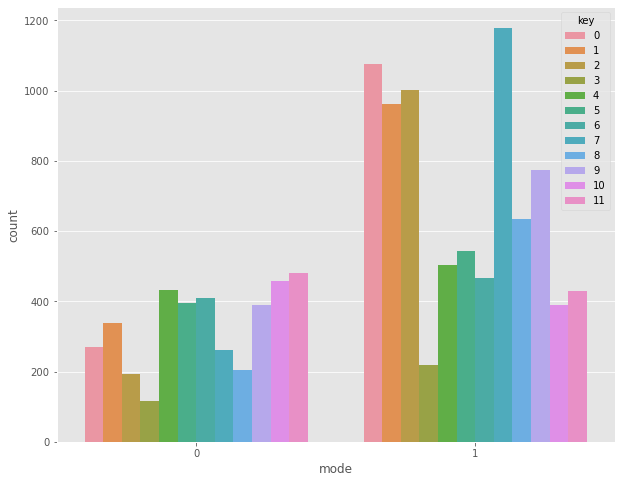

In [41]:
#plot count of target variable key wise
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='mode',hue='key')
plt.show()

In [42]:
df_new=df.drop(['Track','Artist','key'],axis=1)
df_new.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,mode
0,0.511,0.566,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,0
1,0.680,0.578,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,1
2,0.897,0.662,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,0
3,0.834,0.730,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,1
4,0.596,0.854,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,0


In [43]:
df_new.to_csv('model_dataset.csv',index=False,encoding='utf-8')

In [44]:
X=df_new.drop('mode',axis=1)#input variables
Y=df_new['mode']#target variable

In [45]:
X.columns#to display input columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'loudness'],
      dtype='object')

In [46]:
#split data into two parts

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [48]:
print('Original Dataset size : ',df_new.shape)
print('Training input dataset size : ', x_train.shape)
print('Training output dataset size : ', y_train.shape)
print('Testing input dataset size : ', x_test.shape)
print('Testing output dataset size : ', y_test.shape)

Original Dataset size :  (12117, 11)
Training input dataset size :  (8481, 10)
Training output dataset size :  (8481,)
Testing input dataset size :  (3636, 10)
Testing output dataset size :  (3636,)


In [49]:
#it is very important to perform feature scaling here
#because feature values lie in different ranges
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x_train=obj.fit_transform(x_train)
x_test=obj.transform(x_test)

In [50]:
#training model with Logistic regression
from sklearn.linear_model import LogisticRegression

In [51]:
#create object of class Logistic Regression
lr=LogisticRegression()

In [52]:
#fit model
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
#predict 
y_pred=lr.predict(x_test)
print(y_pred)
PP=PN=0
for i in y_pred:
    if i==1:
        PP+=1
    else:
        PN+=1
print('Predicted positive : ',PP)
print('Predicted negative : ',PN)

[1 1 1 ... 1 1 1]
Predicted positive :  3546
Predicted negative :  90


In [54]:
print(y_test)
AP=AN=0
for i in y_test:
    if i==1:
        AP+=1
    else:
        AN+=1
print('Actual positive : ',AP)
print('Actual negative : ',AN)

4356    0
46      1
7909    0
803     1
6975    1
       ..
9212    0
2182    1
2211    1
641     0
4867    0
Name: mode, Length: 3636, dtype: int64
Actual positive :  2465
Actual negative :  1171


In [55]:
#testing score
testing_score=lr.score(x_test,y_test)
print('Testing Score : ',testing_score)

Testing Score :  0.6702420242024203


In [56]:
#accuracy score is 67%
#we will not depend completely on accuracy score
#Evaluation of metrics
#Recall , Precision ,F1-score

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1171
           1       0.68      0.98      0.80      2465

    accuracy                           0.67      3636
   macro avg       0.51      0.50      0.42      3636
weighted avg       0.57      0.67      0.56      3636



In [60]:
#confiusion matrix
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)

[[  31 1140]
 [  59 2406]]


In [61]:
#now convert confusion matrix into array
confusion_matrix=c_matrix.ravel()#ravel() converts 2D array to 1D array
TN,FP,FN,TP=confusion_matrix
print('True Negative : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
print('True Positive : ',TP)

True Negative :  31
False Positive :  1140
False Negative :  59
True Positive :  2406


In [62]:
print('True Positive + False Positive = ',TP+FP)
print('True Negative + False Negative = ',TN+FN)
print('Predicted positive : ',PP)
print('Predicted negative : ',PN)

True Positive + False Positive =  3546
True Negative + False Negative =  90
Predicted positive :  3546
Predicted negative :  90


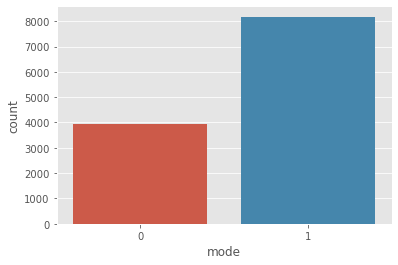

In [63]:
#plot countplot for target variable and
#scatterplot for numerical type feature variables
sns.countplot(data=df,x='mode')
plt.show()

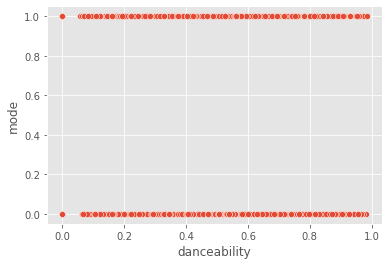

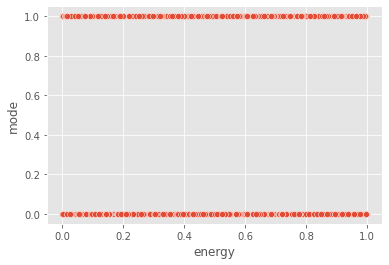

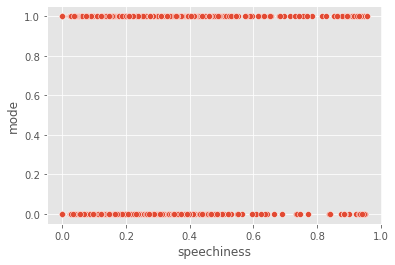

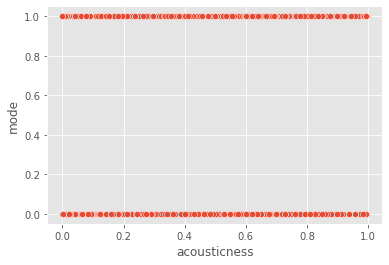

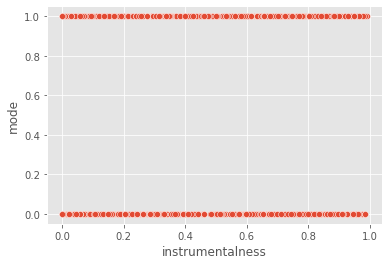

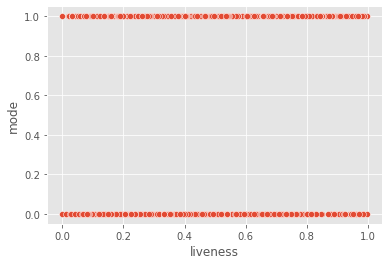

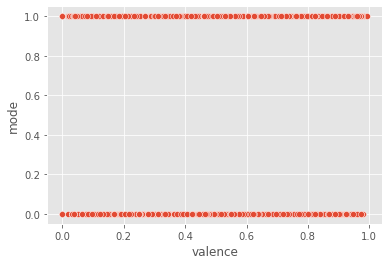

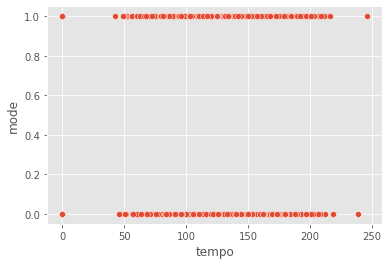

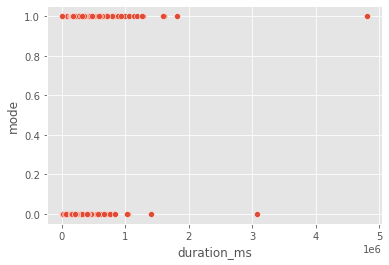

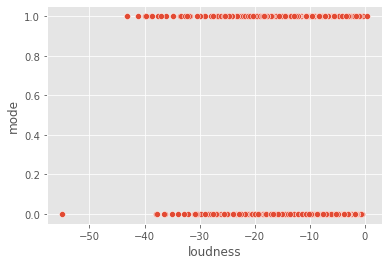

In [64]:
#plot scatter plot for each numerical feature
for col in X:
    sns.scatterplot(data=df_new,x=col,y='mode')
    plt.show()

GDA

In [65]:
df_new.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,mode
0,0.511,0.566,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,0
1,0.680,0.578,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,1
2,0.897,0.662,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,0
3,0.834,0.730,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,1
4,0.596,0.854,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,0


In [66]:
X = df_new.drop(columns = "mode").values
Y = df_new["mode"].values

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=1)

In [68]:
print('Original Dataset size : ',df_new.shape)
print('Training input dataset size : ', x_train.shape)
print('Training output dataset size : ', y_train.shape)
print('Testing input dataset size : ', x_test.shape)
print('Testing output dataset size : ', y_test.shape)

Original Dataset size :  (12117, 11)
Training input dataset size :  (8481, 10)
Training output dataset size :  (8481,)
Testing input dataset size :  (3636, 10)
Testing output dataset size :  (3636,)


In [69]:
pca = PCA(n_components=2)#create object of class PCA

In [70]:
#fit model
pca.fit(x_train)

PCA(n_components=2)

In [71]:
#trasformation of input variables
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

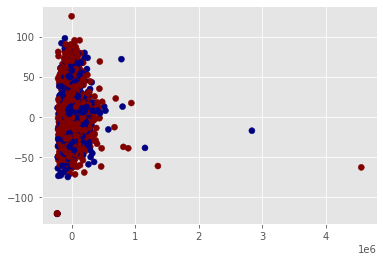

In [72]:
plt.scatter(x_train.T[0], x_train.T[1], c=y_train, cmap='jet');

In [73]:
phi = np.mean(y_train == 1)

In [74]:
indices = (y_train == 0)
denominator = np.sum(indices)
numerator = np.sum(x_train[indices], axis=0)
mu_0 = numerator / denominator

In [75]:
indices = (y_train == 1)
denominator = np.sum(indices)
numerator = np.sum(x_train[indices], axis=0)
mu_1 = numerator / denominator

In [76]:
mu = [mu_0, mu_1]
 
# Initialize the sum
x_minus_mu = x_train[0] - mu[y_train[0]]
# We don't want rank-one arrays
x_minus_mu = x_minus_mu.reshape(*(x_minus_mu.shape), 1)
s = np.matmul(x_minus_mu, x_minus_mu.T)
 
m = len(y_train)
 
for i in range(1, m):
    x_minus_mu = x_train[i] - mu[y_train[i]]
    x_minus_mu = x_minus_mu.reshape(*(x_minus_mu.shape), 1)
    s += np.matmul(x_minus_mu, x_minus_mu.T)
s/= m

In [77]:
pi = 3.1415926535
n = len(mu_0) # Or mu_1, or any of the X
denominator = (2 * pi) ** (n / 2) * np.sqrt(np.linalg.det(s))
 
predictions = []
 
for x in x_test:
    x_minus_mu0 = x - mu_0
    x_minus_mu0 = x_minus_mu0.reshape(*(x_minus_mu0.shape), 1)
    p_x0 = 1 / denominator * np.exp(-0.5 * np.matmul(x_minus_mu0.T, np.matmul(np.linalg.inv(s), x_minus_mu0)))
    p_x0 = np.squeeze(p_x0)
 
    x_minus_mu1 = x - mu_1
    x_minus_mu1 = x_minus_mu1.reshape(*(x_minus_mu1.shape), 1)
    p_x1 = 1 / denominator * np.exp(-0.5 * np.matmul(x_minus_mu1.T, np.matmul(np.linalg.inv(s), x_minus_mu1)))
    p_x1 = np.squeeze(p_x1)
 
    if p_x1 >= p_x0:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

3636


In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy ',accuracy_score(y_test, predictions))

Accuracy  0.536028602860286
